# K-Means Clustering

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation

In [11]:
df = pd.read_csv('alena.csv')
df['level CGPA']=np.where (df['CGPA']<=8.0,0,1)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit,level CGPA
0,1,337,4.770685,1.386294,4.5,9.65,1,0.92,1
1,2,324,4.672829,1.386294,4.5,8.87,1,0.76,1
2,3,316,4.644391,1.098612,3.5,8.00,1,0.72,0
3,4,322,4.700480,1.098612,2.5,8.67,1,0.80,1
4,5,314,4.634729,0.693147,3.0,8.21,0,0.65,1
...,...,...,...,...,...,...,...,...,...
395,396,324,4.700480,1.098612,3.5,9.04,1,0.82,1
396,397,325,4.672829,1.098612,3.5,9.11,1,0.84,1
397,398,330,4.753590,1.386294,4.5,9.45,1,0.91,1
398,399,312,4.634729,1.098612,4.0,8.78,0,0.67,1


In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'LOR', 'CGPA', 'Research', 'Chance of Admit', 'level CGPA']).round()

,Serial No.,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit,level CGPA
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
395,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
396,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
397,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
398,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


# Number of clusters

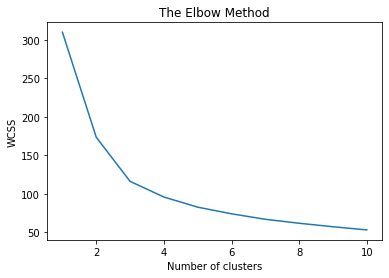

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


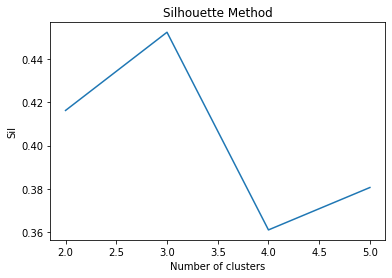

2:0.41617363832676524
3:0.45224489542278745
4:0.36106386788429295
5:0.38062779115050277


In [14]:
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

# Model

In [15]:
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 2, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'LOR', 'CGPA', 'Research', 'Chance of Admit', 'level CGPA'])

,Serial No.,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit,level CGPA
0,0.513932,0.379679,0.452244,0.519394,0.512701,0.455152,0.037433,0.462694,0.679144
1,0.487769,0.673521,0.686236,0.767523,0.701291,0.680648,0.995305,0.739474,0.967136


# Feature Reduction

In [16]:
X = df[:, [1, 2, 8]]

In [17]:
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['year','price','cost level']).round()

,year,price,cost level
0,1.0,1.0,1.0
1,0.0,0.0,0.0


Можем сделать вывод что данные разбились на два класса. Один успешных, а второй нет

# Results matching

In [18]:
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [19]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.45378686249284456

# Pickle results

In [ ]:
import pickle
obj = {'km': km}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()